## IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## LOADING DATA

In [2]:
df_train = pd.read_csv(r"C:\Users\anura\OneDrive\Desktop\Encryptix\Credit Card Fraud\fraudTrain.csv")

In [3]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
df_test=pd.read_csv(r"C:\Users\anura\OneDrive\Desktop\Encryptix\Credit Card Fraud\fraudTest.csv")

In [5]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## DATA PRE PROCESSING

In [6]:
# TRAIN DATA
df_train.shape

(1296675, 23)

In [7]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
#Dropping columns with high cardianality,unique aobjects and indexing
df_train.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)

In [10]:
df_train.shape

(1296675, 20)

In [11]:
df_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,1371816816,42.788940,-103.241160,0


In [12]:
data = df_train.head(n = 20000)

In [13]:
data.is_fraud.value_counts()  #finding is_fraud values in that 20000 rows

is_fraud
0    19850
1      150
Name: count, dtype: int64

In [ ]:
#Converting categorical values into binary for easily applying M.L algos
df_processed = pd.get_dummies(data=data) 

short example of pd.get_dummies()
con = pd.Series(list('abcba'))
print(pd.get_dummies(con))
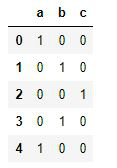

In [15]:
df_processed

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4104312520615374,98.86,92561,33.6401,-116.5567,1661,1326428819,33.767565,-117.341778,0,...,False,False,False,False,False,False,False,False,False,False
19996,30343344410970,2.04,16239,41.4622,-79.1306,4172,1326428902,40.594885,-79.119914,0,...,False,False,False,False,False,False,False,False,False,False
19997,3502088871723054,38.52,20895,39.0298,-77.0793,19054,1326428946,39.552430,-77.582253,0,...,False,False,False,False,False,False,False,False,False,False
19998,2706977570537524,110.12,45698,39.2830,-82.3977,341,1326428969,38.402828,-82.689669,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_processed.shape

(20000, 23553)

In [17]:
x_train = df_processed.drop(columns='is_fraud', axis=1)
y_train = df_processed['is_fraud']   #Target Variable

In [18]:
# FOR TEST DATA
df_test.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


In [19]:
df_test.shape

(555719, 20)

In [20]:
data_test = df_test.sample(frac=1, random_state=1).reset_index() #frac=1 used for randomly shuufle the rows and should return all rows
data_test = data_test.head(n = 5000)
data_test.is_fraud.value_counts()

is_fraud
0    4979
1      21
Name: count, dtype: int64

In [21]:
df_processed_test = pd.get_dummies(data=data_test)

In [22]:
df_processed_test

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,207181,4229733778084049,41.17,42701,37.6848,-85.8784,48194,1378054835,38.370429,-86.671765,...,False,False,False,False,False,False,False,False,False,False
1,501018,4223708906367574214,51.89,45051,39.0965,-84.6431,177,1387521110,39.090859,-84.115650,...,False,False,False,False,False,False,False,False,False,False
2,312515,30175986190993,2.22,56592,47.5375,-95.9941,516,1382090733,47.285136,-96.180797,...,False,False,False,False,False,False,False,False,False,False
3,407433,675909898057,87.21,10504,41.1360,-73.7009,7987,1385702190,41.503596,-73.220229,...,False,False,False,False,False,False,False,False,False,False
4,386454,30092964733035,79.78,41056,38.6207,-83.8067,14228,1384849723,39.043199,-83.842076,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,276550,4169388510116,30.92,14537,43.0330,-77.1575,207,1380709974,43.982001,-77.148808,...,False,False,False,False,False,False,False,False,False,False
4996,16702,36722699017270,77.00,85173,33.2887,-111.0985,2872,1372310918,32.973732,-111.806232,...,False,False,False,False,False,False,False,False,False,False
4997,72934,370877495212014,483.95,28659,36.2017,-81.1286,21134,1373984359,36.534781,-80.249007,...,False,False,False,False,False,False,False,False,False,False
4998,288038,4099707841315751,132.76,22968,38.2586,-78.4074,9815,1381087818,37.609847,-77.656158,...,False,False,False,False,False,False,False,False,False,False


In [23]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

# MODELLING ON DIFFERENT CLASSIFIERS

## 1.LOGISTIC REGRESSION

In [24]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
predictions1 = LR.predict(x_test)

In [26]:
predict_proba = LR.predict_proba(x_test)

In [27]:
predict_proba   #probabilities of class 0 and class 1

array([[0.5009927 , 0.4990073 ],
       [0.50000023, 0.49999977],
       [0.50001427, 0.49998573],
       ...,
       [0.50128608, 0.49871392],
       [0.50099409, 0.49900591],
       [0.50012684, 0.49987316]])

In [28]:
LR_Accuracy_Score = accuracy_score(y_test, predictions1)
print(LR_Accuracy_Score)

0.9925


## 2.DECESSION TREE

In [29]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
predictions2 = Tree.predict(x_test)

In [31]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions2)
Tree_JaccardIndex = jaccard_score(y_test, predictions2)
Tree_F1_Score = f1_score(y_test, predictions2)


print(Tree_Accuracy_Score)
print(Tree_JaccardIndex)
print(Tree_F1_Score)

1.0
1.0
1.0


## 3.RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
predictions3=RF.predict(x_test)

In [58]:
RF_accuracy=accuracy_score(y_test,predictions3)

In [59]:
print(RF_accuracy)

1.0
